In this notebook we plot signals of different clusters and with different parameters to see whether we can visually distinguish true and spurious PAC. 

### Imports

In [68]:
import os 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert


os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab\Code\distinguish_pac')
import module_pac_functions as pacf


In [17]:
# Set directory in which the data structure can be found
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# Use Pickle to load data
load_data = open('clean_db_20s_clustered.pkl','rb')
clean_db = pickle.load(load_data)

In [18]:
# Extract variables for clean_db
subj_name   = clean_db['subj_name']
subj        = clean_db['subj']
ch          = clean_db['ch']
ep          = clean_db['ep']
locs        = clean_db['locs']
dat_name    = clean_db['dat_name']
data        = clean_db['data']
pac_rhos    = clean_db['pac_rhos']
resamp_zvals = clean_db['resamp_zvals']
resamp_pvals = clean_db['resamp_pvals']
psd_params  = clean_db['psd_params']
backgr_params = clean_db['backgr_params']
rd_sym      = clean_db['rd_sym']
pt_sym      = clean_db['pt_sym']
bursts      = clean_db['bursts']
period      = clean_db['period']
volt_amp    = clean_db['volt_amp']
fs          = clean_db['fs']
clusters    = clean_db['clusters']

# For some variables, calculate the mean, median and/or STD
mean_rd_sym     = [np.mean(rd_sym[ii]) for ii in range(len(rd_sym))]
median_rd_sym   = [np.median(rd_sym[ii]) for ii in range(len(rd_sym))]
std_rd_sym      = [np.std(rd_sym[ii]) for ii in range(len(rd_sym))]

mean_pt_sym     = [np.mean(pt_sym[ii]) for ii in range(len(pt_sym))]
median_pt_sym   = [np.median(pt_sym[ii]) for ii in range(len(pt_sym))]
std_pt_sym      = [np.std(pt_sym[ii]) for ii in range(len(pt_sym))]

median_volt_amp = [np.median(volt_amp[ii]) for ii in range(len(volt_amp))]
median_period   = [np.median(period[ii]) for ii in range(len(period))]

# Split psd_params into the Central Frequency, Amplitude and BandWidth
psd_cf          = [psd_params[ii][0] for ii in range(len(psd_params))]
psd_amp         = [psd_params[ii][1] for ii in range(len(psd_params))]
psd_bw          = [psd_params[ii][2] for ii in range(len(psd_params))]

# Also split the background_params into seperate parameters
backgr_offset = [backgr_params[ii][0] for ii in range(len(backgr_params))]
backgr_knee   = [backgr_params[ii][1] for ii in range(len(backgr_params))]
backgr_exp  = [backgr_params[ii][2] for ii in range(len(backgr_params))]

clean_db.clear()

In [83]:
cluster0_idx = np.squeeze(np.where(clusters==0))
cluster1_idx = np.squeeze(np.where(clusters==1))

(-49.95, 1048.95, -8691.8, 4393.8)

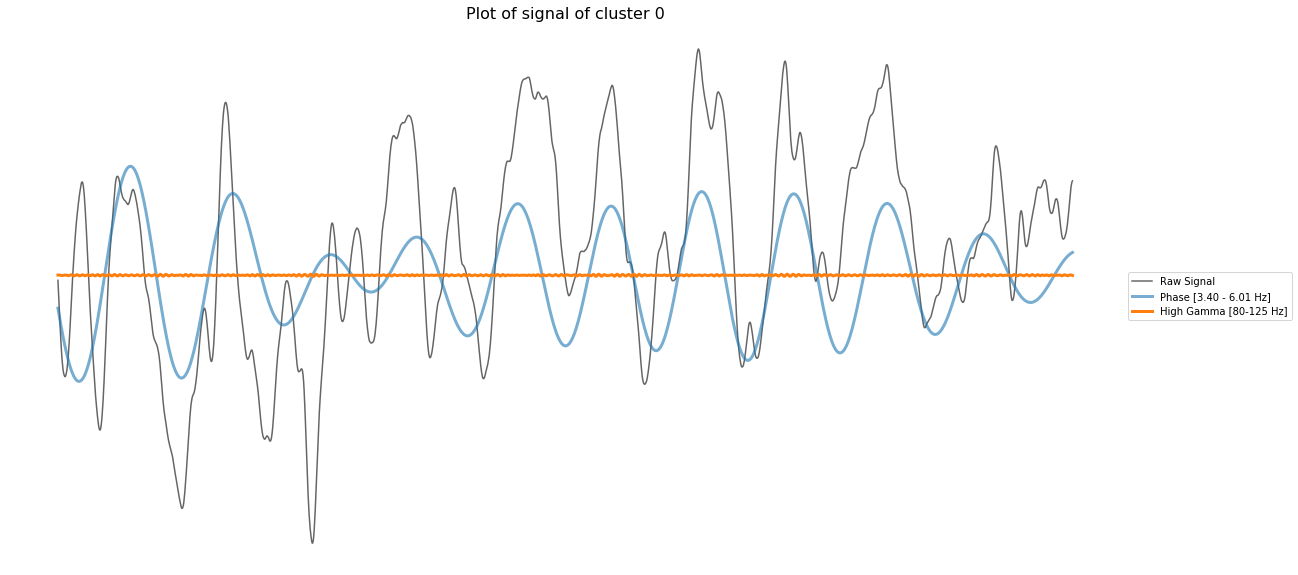

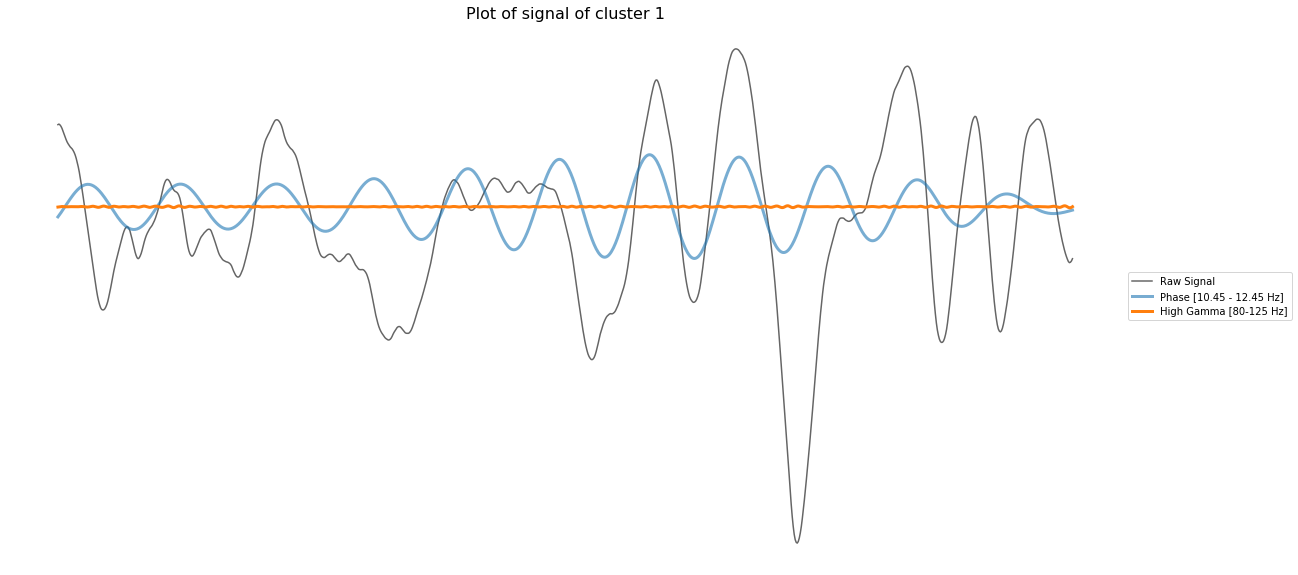

In [90]:
# choose subject from a cluster
ii = 2

### CLUSTER 0
sig = data[cluster0_idx[ii]]
plt_time = [5 * fs, 7* fs]

# compute phase band
lower_phase = psd_cf[cluster0_idx[ii]] - (psd_bw[cluster0_idx[ii]] / 2)
upper_phase = psd_cf[cluster0_idx[ii]] + (psd_bw[cluster0_idx[ii]] / 2)

# phase providing band
phase_providing_band = [lower_phase, upper_phase]; 

# use butter bandpass filter to extract this frequency range
phase_data = pacf.butter_bandpass_filter(sig, phase_providing_band[0], phase_providing_band[1], round(float(fs)));\

# hilbert transfer data
phase_data_hilbert = hilbert(phase_data);

# calculate the phase of the signal by using angle 
phase_data_angle = np.angle(phase_data_hilbert);

# set range of the band 
amplitude_providing_band = [80,125]

# use butter bandpass filter to extract this frequency range
amp_data = pacf.butter_bandpass_filter(sig, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

# hilbert transform data
amp_data_hilbert = hilbert(amp_data);

# calculate absolute values
amp_data_abs = abs(amp_data_hilbert);  

plt.figure(figsize = (20,10));
plt.plot((sig[plt_time[0]:plt_time[1]]),label= 'Raw Signal', color='black', alpha=.6)
plt.plot((phase_data_hilbert[plt_time[0]:plt_time[1]]),
         label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
         linewidth=3, alpha=.6)
plt.plot((amp_data_hilbert[plt_time[0]:plt_time[1]]),label= 'High Gamma [80-125 Hz]',
         linewidth=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Plot of signal of cluster 0', size=16)
plt.axis('off')

# choose subject from a cluster

### CLUSTER 1
sig = data[cluster1_idx[ii]]
plt_time = [5 * fs, 6* fs]

# compute phase band
lower_phase = psd_cf[cluster1_idx[ii]] - (psd_bw[cluster1_idx[ii]] / 2)
upper_phase = psd_cf[cluster1_idx[ii]] + (psd_bw[cluster1_idx[ii]] / 2)

# # compute phase band
phase_providing_band = [lower_phase, upper_phase]; 

# use butter bandpass filter to extract this frequency range
phase_data = pacf.butter_bandpass_filter(sig, phase_providing_band[0], phase_providing_band[1], round(float(fs)));\

# hilbert transfer data
phase_data_hilbert = hilbert(phase_data);

# calculate the phase of the signal by using angle 
phase_data_angle = np.angle(phase_data_hilbert);

# set range of the band 
amplitude_providing_band = [80,125]

# use butter bandpass filter to extract this frequency range
amp_data = pacf.butter_bandpass_filter(sig, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

# hilbert transform data
amp_data_hilbert = hilbert(amp_data);

# calculate absolute values
amp_data_abs = abs(amp_data_hilbert);  

plt.figure(figsize = (20,10));
plt.plot((sig[plt_time[0]:plt_time[1]]),label= 'Raw Signal', color='black', alpha=.6)
plt.plot((phase_data_hilbert[plt_time[0]:plt_time[1]]),
         label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
         linewidth=3, alpha=.6)
plt.plot((amp_data_hilbert[plt_time[0]:plt_time[1]]),label= 'High Gamma [80-125 Hz]',
         linewidth=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Plot of signal of cluster 1', size=16)
plt.axis('off')